# The Spark Foundation

# Data science and Business Analytics

Task 6: Prediction using Decision tree algorithm

Author Name:Jadhav Vrushali Maruti

Task:Create desicion tree classifier and visualize it graphically

Dataset: https://bit.ly/3kXTdox

In [ ]:
#installing libraries
!pip install pydotplus
!apt-get install graphviz -y

In [17]:
pip install graphviz

In [15]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Rakshas\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    conda-23.1.0               |   py39haa95532_0         946 KB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hda2c7e1_0         676 KB
    libffi-3.4.2               |       hd77b12b_6  

In [9]:
import pandas as pd

from six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import pydotplus
from sklearn.tree import export_graphviz

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#Loading the dataset
dataset=pd.read_csv(r"C:\Users\Rakshas\Desktop\Dataset\DecisionTreeDataset.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
X = dataset.iloc[:,[1,2,3,4]].values
y = dataset.iloc[:,-1].values

In [18]:
#create an instance of the decision tree classifier
dec_tree = DecisionTreeClassifier(criterion="entropy")
#fit the model with the training data X_train and y_train
dec_tree.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

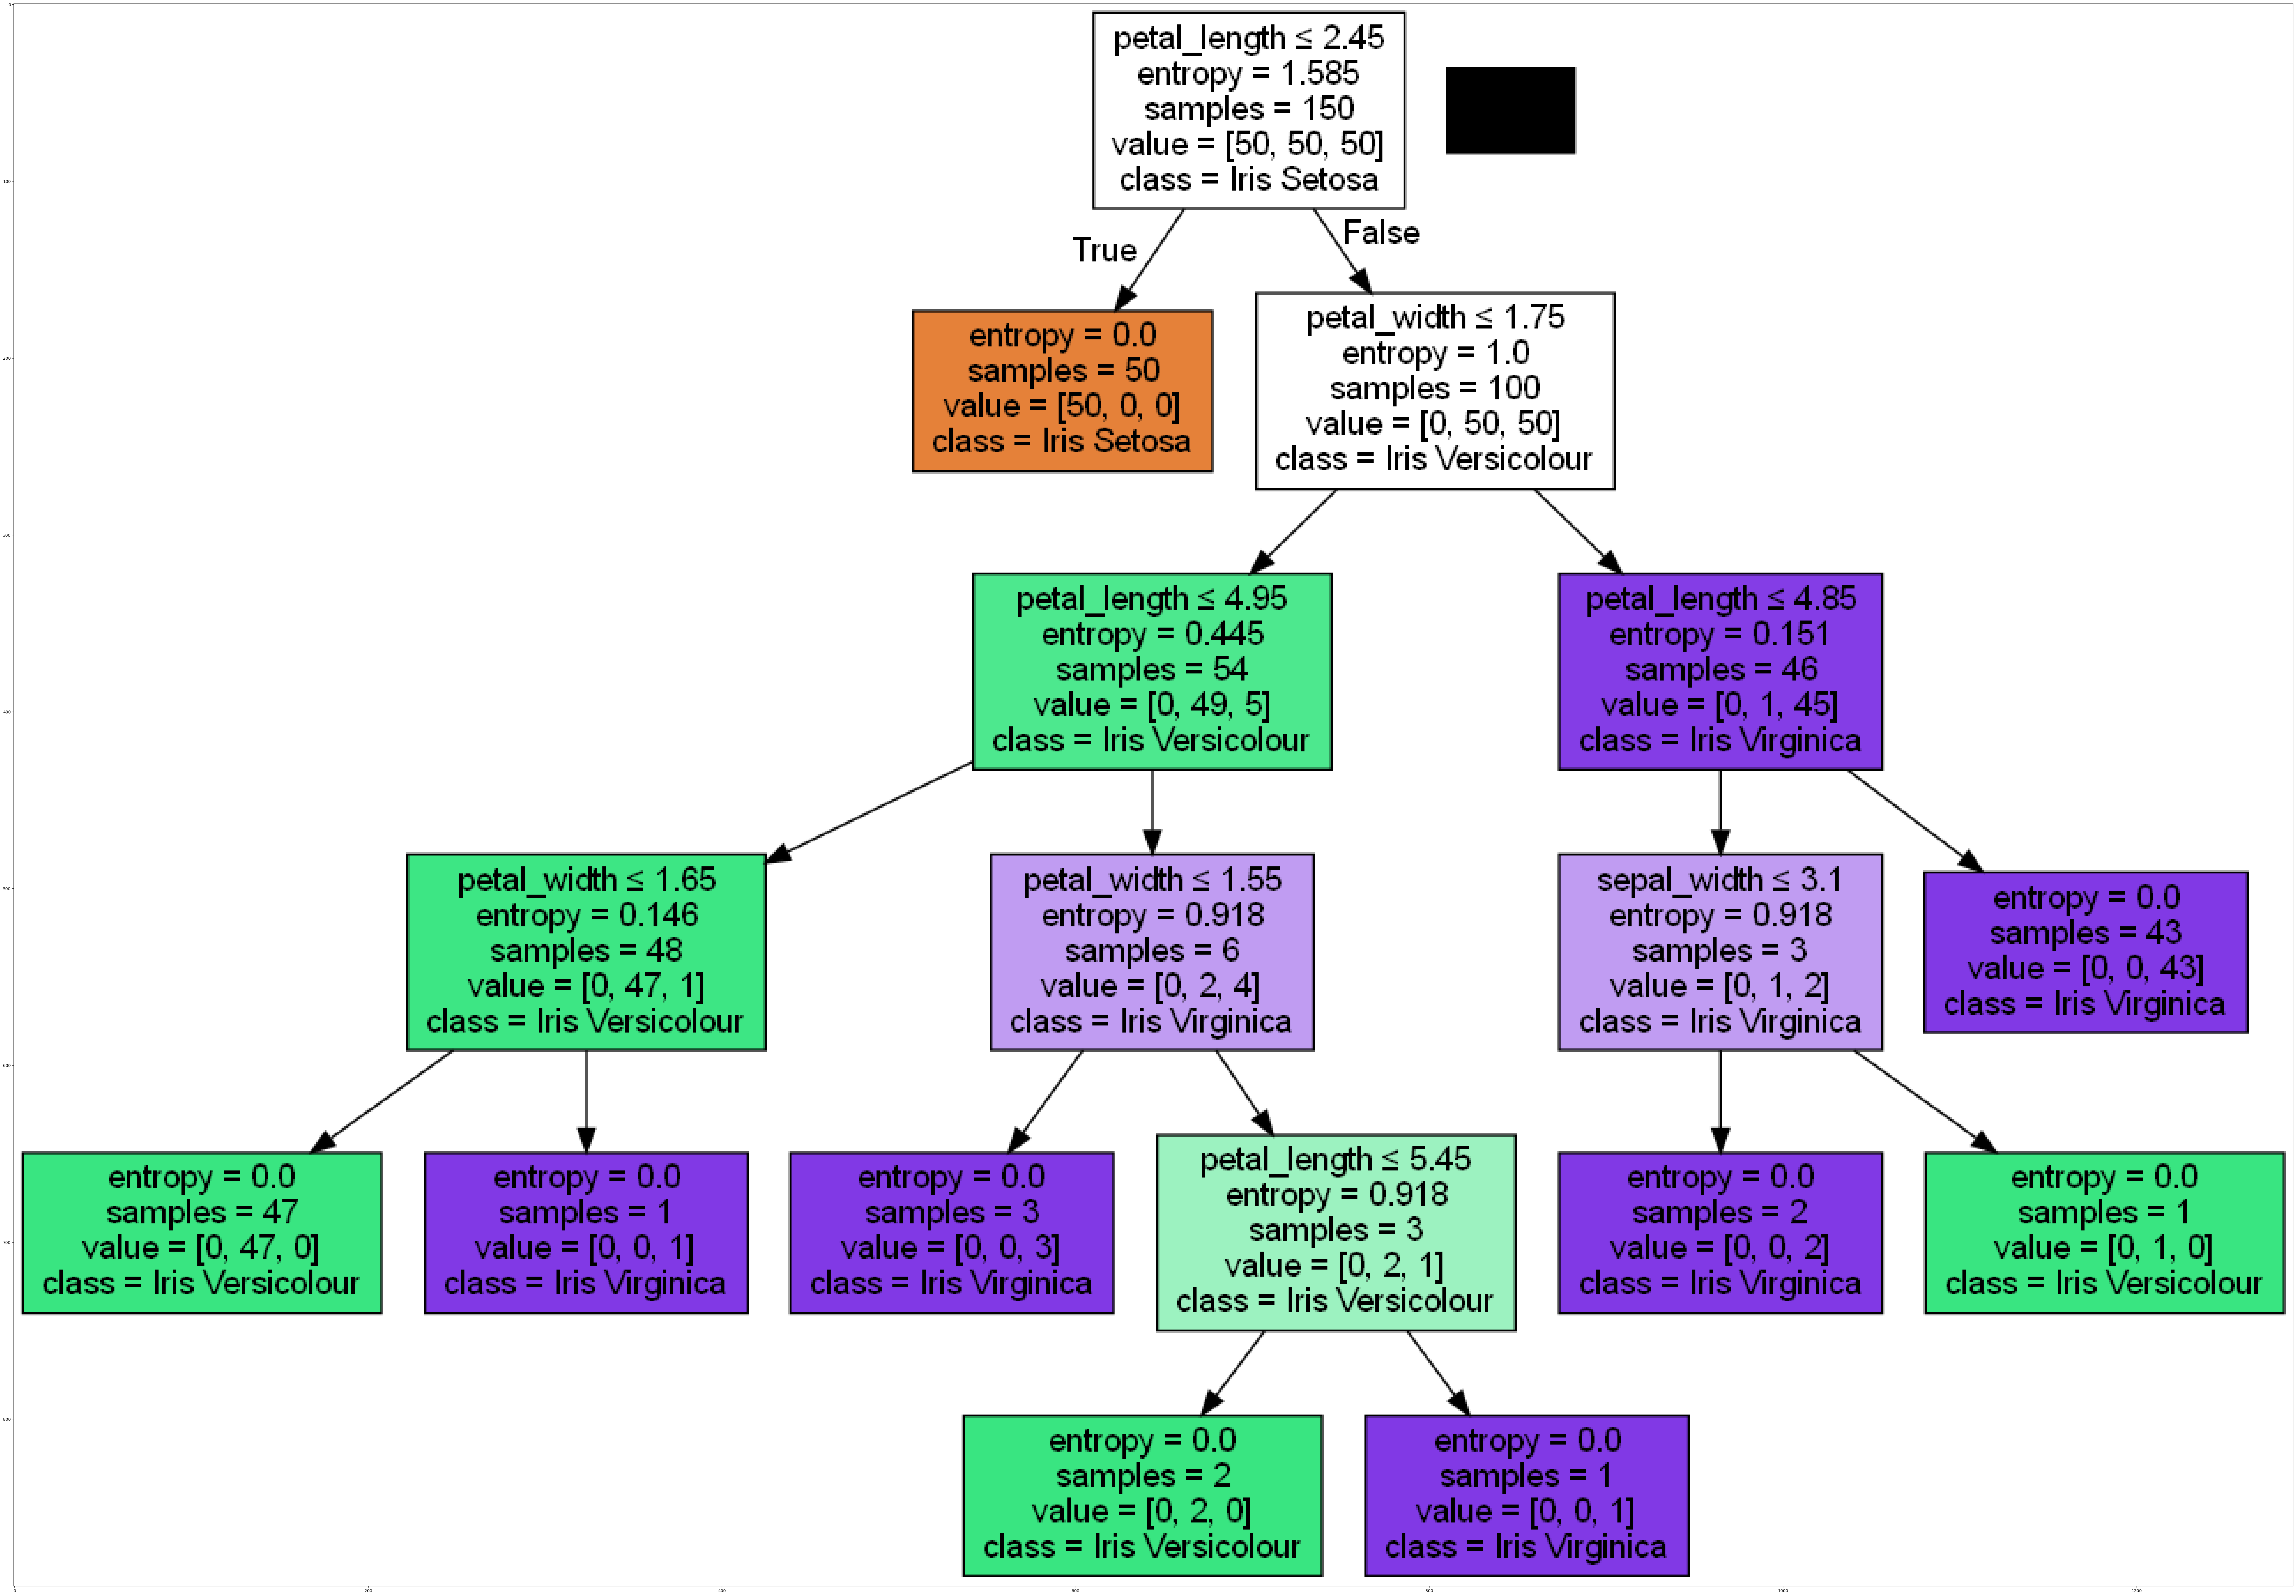

In [19]:
#initialize a StringIO class
dot_data = StringIO()

#file name to save the image
filename = "iris_flower_tree.png"

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] #input values
class_names = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'] #output values

#convert the decision tree model into dot data
out = export_graphviz(dec_tree,
                      feature_names=feature_names,
                      out_file=dot_data,
                      class_names=class_names,
                      filled=True,
                      special_characters=True,
                      rotate=False)

#convert the dot data into a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#save the graph
graph.write_png(filename)

#open and plot the graph
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest');
